## Naive Bayes Classifier
### Bayes Theorem of Probability
- Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

- It follows a similar/straight process as it always adds up to 1. If we have 3 classes and classify 1 and it's greater than 50% we can assign that class, but if not we have to calculate for each to assign the classification. 
<hr>

- **Example:** 
if the fruit is identified on the bases of color, shape, and taste, then red, spherical, and sweet fruit is recognized as an apple. Hence each feature individually contributes to identify that it is an apple without depending on each other.
<img src='./class_photos/likelihood_naive_b.png' alt='Naive Bayes img'>

<br>

1. **Prior Probability :**
    - Total count of Obj. in Group A in the dataset.
    - $$ \textrm{Prior Prob.} -> P(A) = \frac{\textrm{Number of Obj.}}{\textrm{Total Obj.}}$$

1. **Marginal likelihood :**
    - Probability of an Obj. falling in that area.
    - Obtained by drawing a circle by referencing the point to be Classifed as  center.
    - **X** is Number of Similar obj, Or Total points inside the circle, Irrespective of groups they belong to.
$$ \textrm{Marginal Likelihood} -> P(B) = \frac{\textrm{Number of Similar Obj. (X)}}{\textrm{Total Obj.}}$$
<img src='./class_photos/likelihood.png'>

3. **Likelihood :**
    - Probability of Data points falling in that area among group A.
    - $$ \textrm{Likelihood} -> P(B/A) = \frac{\textrm{Number of A among X}}{\textrm{Total A}}$$


- It is highly used in text classification. In text classification tasks, data contains high dimension (as each word represent one feature in the data). It is used in spam filtering, sentiment detection, rating classification etc.

### Pre-processing

In [2]:
# importing the liblaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing the dataset
dataset = pd.read_csv('./class_dataset/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Implementing Naive Bayes theorem

In [3]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

#classifier.predict(sc.transform([[30,87000]]))

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is created")
print(cm)

Confusion Matrix is created
[[65  3]
 [ 7 25]]


### visuallizing the dataset

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


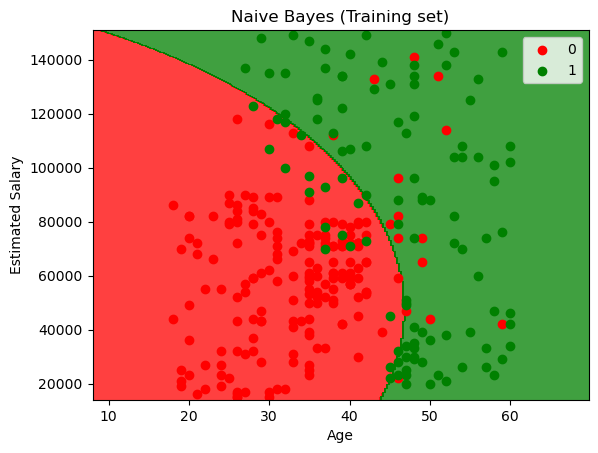

In [4]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


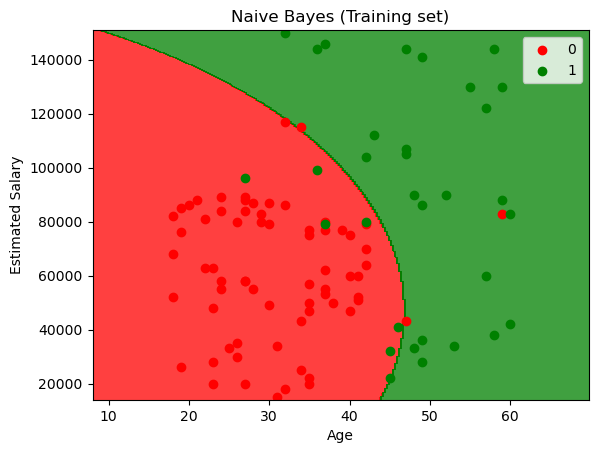

In [5]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()